# Analyzing Airbnb Boston Dataset

This notebook is for analyzing the Airbnb Boston Dataset. I tried to follow **CRISP-DM** framework to get some insights from the dataset. However, I didn't make any model in this notebook, so my process contains front parts of CRISP-DM, but it doesn't contain modeling, evaluation and deployment parts. Here is steps which I followed     

1. Bussiness understanding: regarding business (Airbnb Boston), making meaningful questions and checking the resources what I have.
2. Data Understanding: looking the dataset briefly like identifying features in the dataset and shape (size) of the dataset.  
3. Data Preperation: Cleaning the dataset (Removing missing values).
4. Explore the dataset: exploring the dataset to get some insights about the questions in 'Bussiness understanding' part.

## Business Understanding

Based on these experience, I wanted to figure out which characteristics were strongly related with 'Rating' and 'Price'. Also, I wanted to find a zipcode area which got the highest location points. These are my 3 questions about Airbnb in Boston.
- Which factor has the highest correlation with 'Price'?
- Which factor has the highest correlation with 'Review score'?
- Which zipcode got the best location score?

I used Airbnb Boston dataset from Kaggle. This dataset was consisted with three sub-datasets (resource: https://www.kaggle.com/airbnb/boston) :
- Listings, including full descriptions and average review score 
- Reviews, including unique id for each reviewer and detailed comments 
- Calendar, including listing id and the price and availability for that day

## Data Understanding

In this project, I used only 'listings' dataset. The dataset was made with 95 columns (features) about 3585 rows (entries). The dataset already contained location information (address, lat, lng, neighborhood, zipcode and etc.), physical characteristics (bedrooms, bathrooms, and etc.), price, and review score (overall, location, communication, and etc.), so I thought I didn't need to cleaning and analyzing the other datasets.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing datasets
review_df = pd.read_csv('data/reviews.csv')
listing_df = pd.read_csv('data/listings.csv')
calendar_df = pd.read_csv('data/calendar.csv')

In [3]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In this website (https://rstudio-pubs-static.s3.amazonaws.com/407929_afc5ef0f2ad648389447a6ca3f4a7cd4.html), I could find that explanations about each columns in `listing`. 

In [6]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


## Data Preparation

In the preparing process, First I dropped meaningless columns like 'id' or 'url'. Second, I removed columns which contained more than 1000 missing values. Third, I visualized a histogram of the number of missing values in each row.

In [7]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [8]:
# drop 'id'  and ' url' columns
columns = listing_df.columns
url_columns = [i for i in columns if ('url' in i) or ('id' in i) or ('host' in i)]
listing_df = listing_df.drop(url_columns, axis=1)
listing_df = listing_df.drop(['summary','city','market','neighbourhood'], axis=1)

In [9]:
# find columns which have missing values more than 1000, and then drop that columns 
target_columns = [i for i in listing_df.columns.tolist()  if listing_df[i].isnull().sum()>1000] 
listing_df = listing_df.drop(target_columns, axis=1)

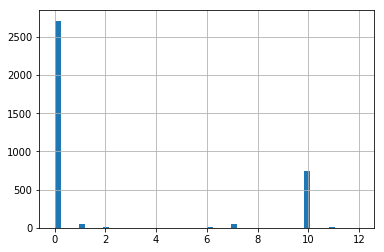

In [10]:
# check a histogram of the number of null values in each row
listing_df.isnull().sum(axis=1).hist(bins=50)

Based on missing columns in the above histogram, I could figure out most of rows had missing values less than 10. For this reason, I decided to remove rows which had more than 9 missing missing values.

In [11]:
# drop the rows which had more than 9 missing values
listing_df = listing_df.loc[listing_df.isnull().sum(axis=1)<10,:]

In [12]:
# re-check the columns which had missing values
listing_df.loc[:,listing_df.isnull().sum(axis=0)>0].head()

,zipcode,property_type,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,02131,Apartment,1.0,1.0,1.0,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,02131,Apartment,1.0,1.0,1.0,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,NaN,House,1.0,1.0,2.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,02131,House,1.5,1.0,2.0,99.0,10.0,10.0,10.0,10.0,9.0,10.0
5,02131,Condominium,1.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0


Based on the dataframe above, I thought that columns which had missing values were important to get insights of questions. So, I decided keep that columns, and I appliled `dropna` funcion in Pandas.

In [13]:
# using dropna function to remove missing values
listing_df = listing_df.dropna(axis=0)

In [14]:
# change 'price' column to float data type
listing_df['price']=listing_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
# checking the size of processed dataset
listing_df.shape

(2710, 49)

## Explore the dataset

#### Question 1. Which factor has the highest correlation with 'Price'?

The values of 'accommodates', 'bedrooms', and 'beds' had moderate correlation (0.5<r<0.7) with 'Price'. This meant that there were some positive relationship between the price and the capacity of Airbnb house. I also could figure out these trends in below boxplots.

Text(0, 0.5, 'Correlation')

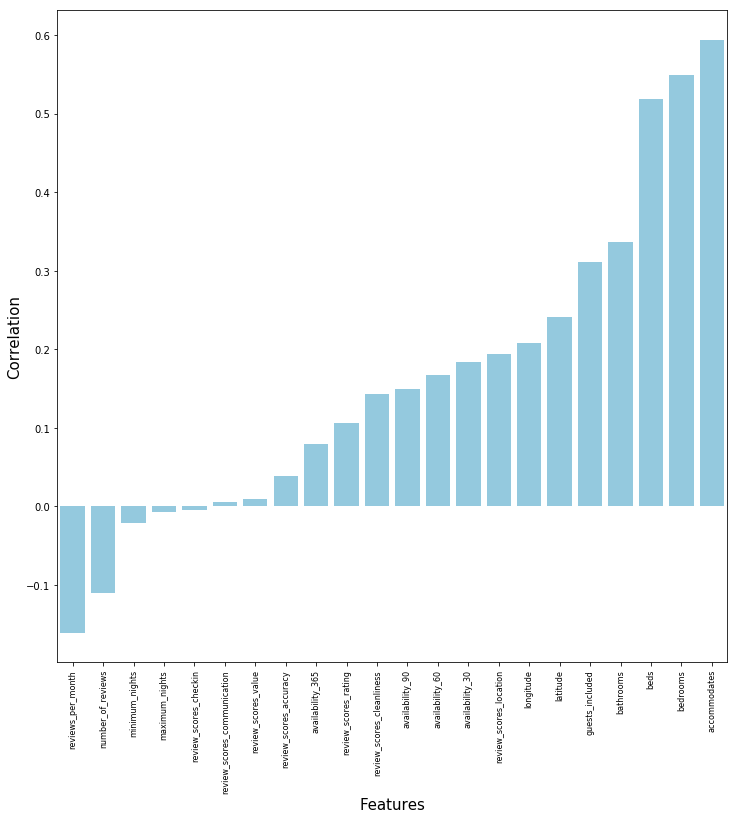

In [16]:
# Correlation between price and the other features
plt.figure(figsize=(12,12))
plt.xticks(rotation='vertical', fontsize=8)
price_corr_df = listing_df.corr().loc['price',:].drop('price',axis=0)\
                                                .reset_index()\
                                                .rename(columns={'price':'corr','index':'features'})\
                                                .sort_values(by='corr')   
sns.barplot(x='features', y='corr', data = price_corr_df, color = 'skyblue')
plt.xlabel(xlabel='Features', fontsize=15)
plt.ylabel(ylabel='Correlation', fontsize=15)

Text(0, 0.5, 'Price')

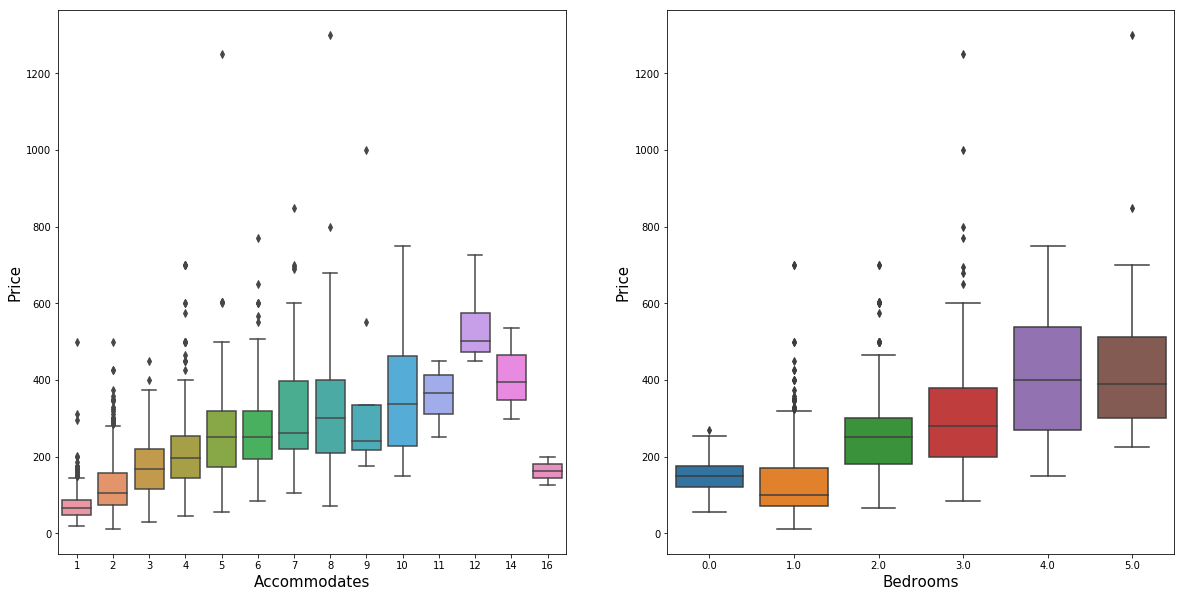

In [17]:
# Boxplots about accommodates, bedrooms and price
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='accommodates', y='price', data=listing_df)
plt.xlabel(xlabel='Accommodates', fontsize=15)
plt.ylabel(ylabel='Price', fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='bedrooms', y='price', data=listing_df)
plt.xlabel(xlabel='Bedrooms', fontsize=15)
plt.ylabel(ylabel='Price', fontsize=15)

Text(0, 0.5, 'Correlation')

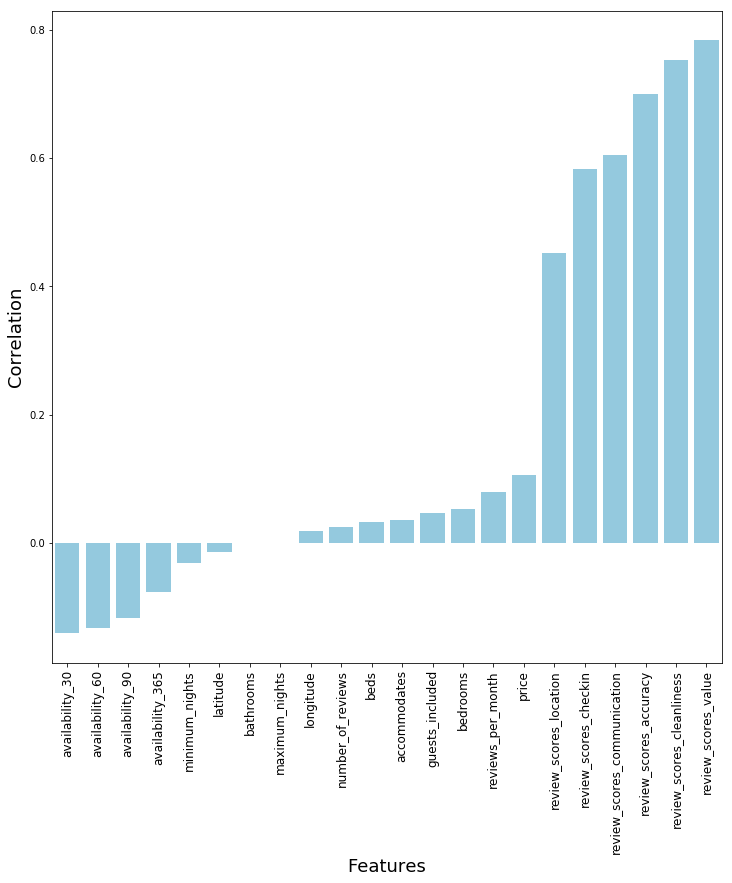

In [18]:
# Correlation between overall review score and the other features
plt.figure(figsize=(12,12))
plt.xticks(rotation='vertical', fontsize=12)
price_corr_df = listing_df.corr().loc['review_scores_rating',:].drop('review_scores_rating',axis=0)\
                                                               .reset_index()\
                                                               .rename(columns={'review_scores_rating':'corr'})\
                                                               .sort_values(by='corr')   
sns.barplot(x='index', y='corr', data = price_corr_df, color = 'skyblue')
plt.xlabel(xlabel='Features', fontsize=18)
plt.ylabel(ylabel='Correlation', fontsize=18)

To compare location scores by zipcode, I aggregated the dataframe by zipcode.

In [19]:
# groupby zipcode
zipcode_df = listing_df.groupby('zipcode').mean()[['review_scores_rating','price','review_scores_location']]
zipcode_df = pd.DataFrame(zipcode_df)
zipcode_df = zipcode_df.reset_index()

In [20]:
# this function is for drawing barchart for specific columns

def barchart(df,column,sort_value):
    '''
    This function is for drawing barchart with 'zipcode_df (pandas dataframe)'.
    
    Input:
        df: zipcode_df which I made above cell
        column: target column name (str) which is for y_axis of the barchart
        sort_value: column name (str) which is used for sorting the dataset
    
    Output: None    
    
    '''
    plt.figure(figsize=(20,10))
    plt.xticks(rotation='vertical')
    df = df.sort_values(by=sort_value)
    avg_ = df[column].mean()
    plt.axhline(y=avg_, c='r', linestyle=':', label='average= {}'.format(round(avg_,2)))
    sns.barplot(x='zipcode', y=column, data = df, color = 'skyblue')
    plt.xlabel(xlabel='zipcode', fontsize=18)
    plt.ylabel(ylabel=column, fontsize=18)
    plt.legend()

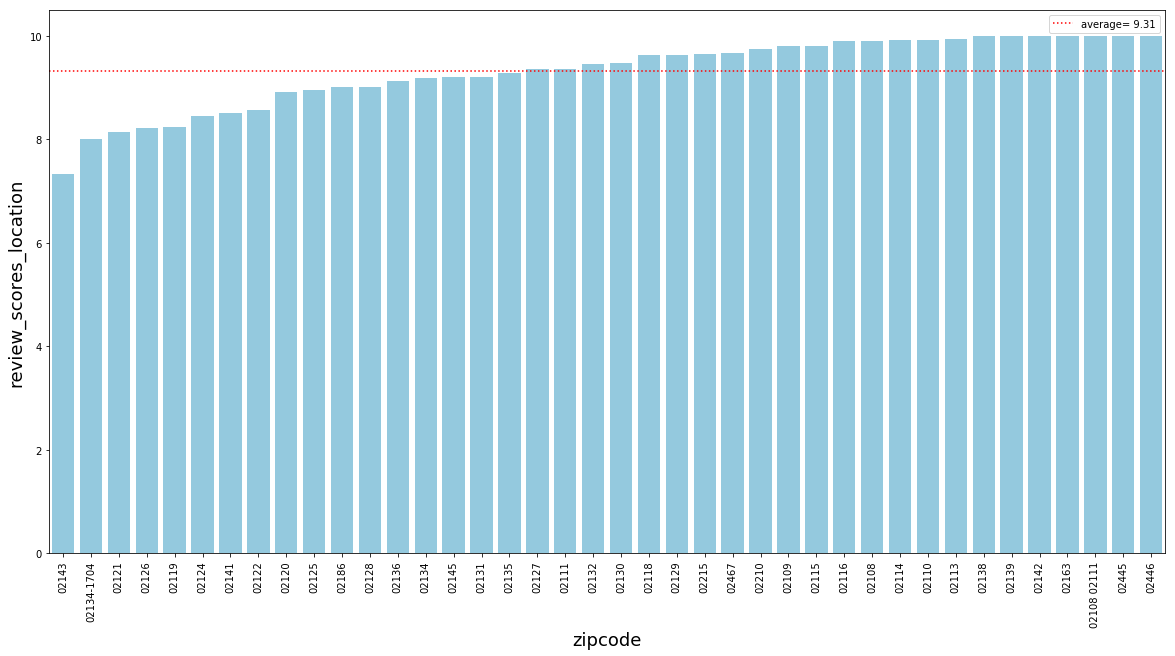

In [21]:
# barchart about location score
barchart(zipcode_df,'review_scores_location','review_scores_location')

Also, to find the best location from perspective of 'cost effectiveness'. I calculated 'cost effectiveness' of each zipcode. Because 'price' and 'overall rating' had different scale, so I re-scaled each column to fit 0~1 range. And then, I divided 'overall rating score' by 'price' to get 'cost effectiveness'.

In [22]:
# calculate cost effectiveness

zipcode_df['norm_rating'] = (zipcode_df['review_scores_rating']-zipcode_df['review_scores_rating'].min())\
                            /(zipcode_df['review_scores_rating'].max()-zipcode_df['review_scores_rating'].min())
zipcode_df['norm_price'] = (zipcode_df['price']-zipcode_df['price'].min())\
                            /(zipcode_df['price'].max()-zipcode_df['price'].min())
zipcode_df['cost_effectiveness'] = zipcode_df['norm_rating']/zipcode_df['norm_price']

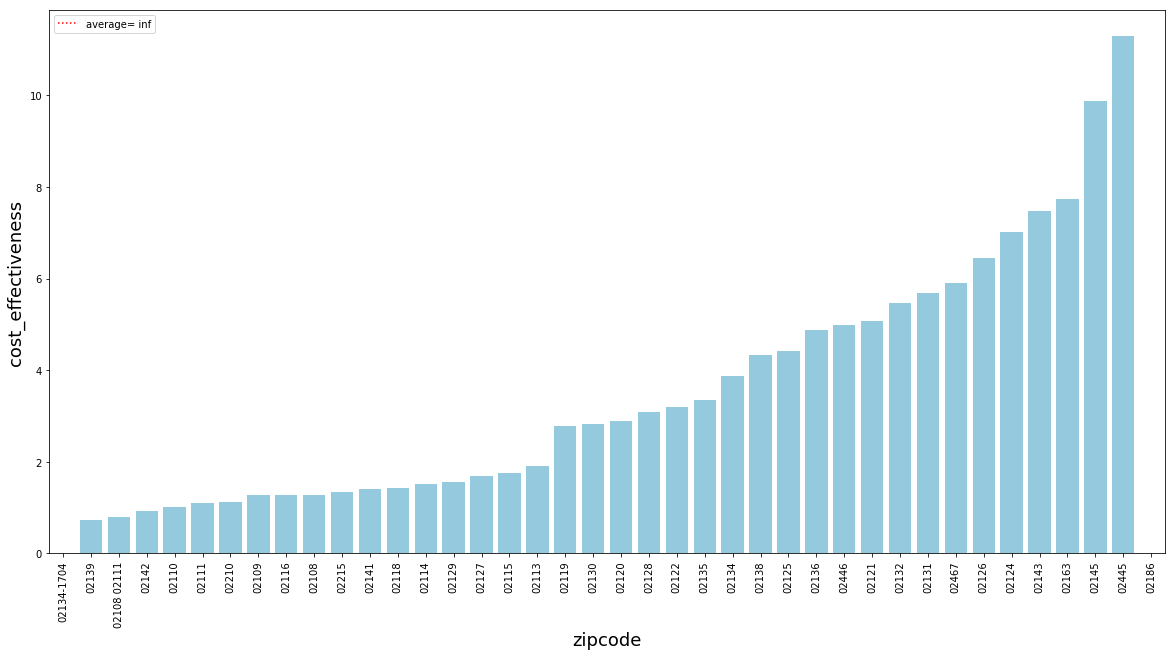

In [23]:
barchart(zipcode_df,'cost_effectiveness','cost_effectiveness')